In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
df = pd.DataFrame(columns = ['retire_67', 'retire_68', 'retire_69', 'retire_70'], index= pd.date_range("2021-03-01", periods=420, freq="M"))

lois_df = pd.DataFrame(columns = ['retire_66', 'retire_67', 'retire_68', 'retire_69', 'retire_70'], index = pd.date_range('2021-03-01', periods = 420, freq = 'M'))

lois_df2 = pd.DataFrame(columns = ['retire_66', 'retire_67', 'retire_68', 'retire_69', 'retire_70'], index = pd.date_range('2021-03-01', periods = 420, freq = 'M'))

In [3]:
def calculate_retirement(dataframe, start_date, monthly_payment):
    counter = 0
    new_col = []
    for i in dataframe.iloc[[np.where(dataframe.index > start_date)][0][0]].index:
        counter += monthly_payment
        new_col.append(counter)
    return new_col

In [4]:
df['retire_67'] = calculate_retirement(df, '2021-02-28', 3175)  
df['retire_68']['2021-05-01':] = calculate_retirement(df, '2021-05-01', 3435)
df['retire_69']['2022-05-01':] = calculate_retirement(df, '2022-05-01', 3695)
df['retire_70']['2023-05-01':] = calculate_retirement(df, '2023-05-01', 3954)

In [5]:
lois_df['retire_66'] = calculate_retirement(lois_df, '2021-02-28', 1241)
lois_df['retire_67']['2022-02-01':] = calculate_retirement(lois_df, '2022-02-01', 1336)
lois_df['retire_68']['2023-02-01':] = calculate_retirement(lois_df, '2023-02-01', 1431)
lois_df['retire_69']['2024-02-01':] = calculate_retirement(lois_df, '2024-02-01', 1526)
lois_df['retire_70']['2025-02-01':] = calculate_retirement(lois_df, '2025-02-01', 1622)

In [6]:
lois_df2['retire_66'] = calculate_retirement(lois_df2, '2021-02-28', 2996)
lois_df2['retire_67']['2022-02-01':] = calculate_retirement(lois_df, '2022-02-01', 2996)
lois_df2['retire_68']['2023-02-01':] = calculate_retirement(lois_df, '2023-02-01', 2996)
lois_df2['retire_69']['2024-02-01':] = calculate_retirement(lois_df, '2024-02-01', 2996)
lois_df2['retire_70']['2025-02-01':] = calculate_retirement(lois_df, '2025-02-01', 2996)

In [7]:
lois_df

,retire_66,retire_67,retire_68,retire_69,retire_70
2021-03-31,1241,NaN,NaN,NaN,NaN
2021-04-30,2482,NaN,NaN,NaN,NaN
2021-05-31,3723,NaN,NaN,NaN,NaN
2021-06-30,4964,NaN,NaN,NaN,NaN
2021-07-31,6205,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2055-10-31,516256,541080,562383,581406,598518
2055-11-30,517497,542416,563814,582932,600140
2055-12-31,518738,543752,565245,584458,601762
2056-01-31,519979,545088,566676,585984,603384


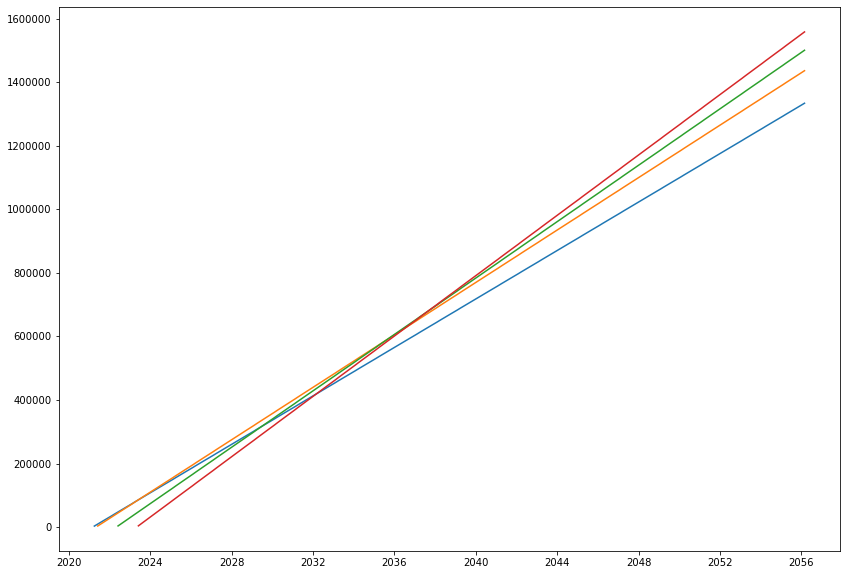

In [8]:
fig, ax = plt.subplots(figsize = (14,10))
plt.plot(df);

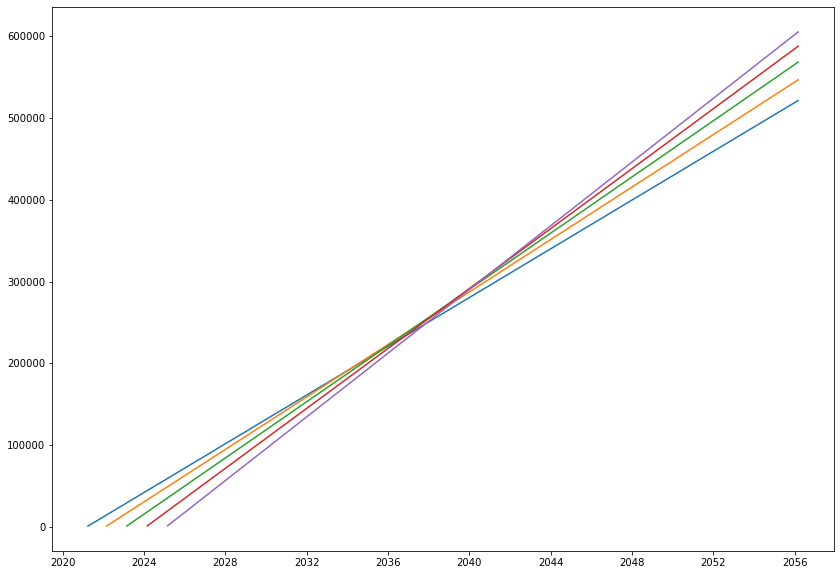

In [9]:
fig, ax = plt.subplots(figsize = (14,10))

plt.plot(lois_df);

In [10]:
df.iloc[[np.where(df.index > '2040-01-01')][0][0]]

,retire_67,retire_68,retire_69,retire_70
2040-01-31,720725,772875,787035,794754
2040-02-29,723900,776310,790730,798708
2040-03-31,727075,779745,794425,802662
2040-04-30,730250,783180,798120,806616
2040-05-31,733425,786615,801815,810570
...,...,...,...,...
2055-10-31,1320800,1422090,1485390,1542060
2055-11-30,1323975,1425525,1489085,1546014
2055-12-31,1327150,1428960,1492780,1549968
2056-01-31,1330325,1432395,1496475,1553922


In [16]:
total_df = pd.DataFrame(pd.DataFrame(columns = ['retire_2021', 'retire_2022', 'retire_2023', 'retire_2024'], index = pd.date_range('2021-03-01', periods = 420, freq = 'M')))

In [17]:
total_df['retire_2021'] = df['retire_67'] + lois_df2['retire_66']
total_df['retire_2022'] = df['retire_68'] + lois_df2['retire_67']
total_df['retire_2023'] = df['retire_69'] + lois_df2['retire_68']
total_df['retire_2024'] = df['retire_70'] + lois_df2['retire_69']

In [22]:
total_df['retire_2022'].fillna(lois_df['retire_66'], inplace = True)
total_df['retire_2023'].fillna(lois_df['retire_66'], inplace = True)
total_df['retire_2024'].fillna(lois_df['retire_66'], inplace = True)

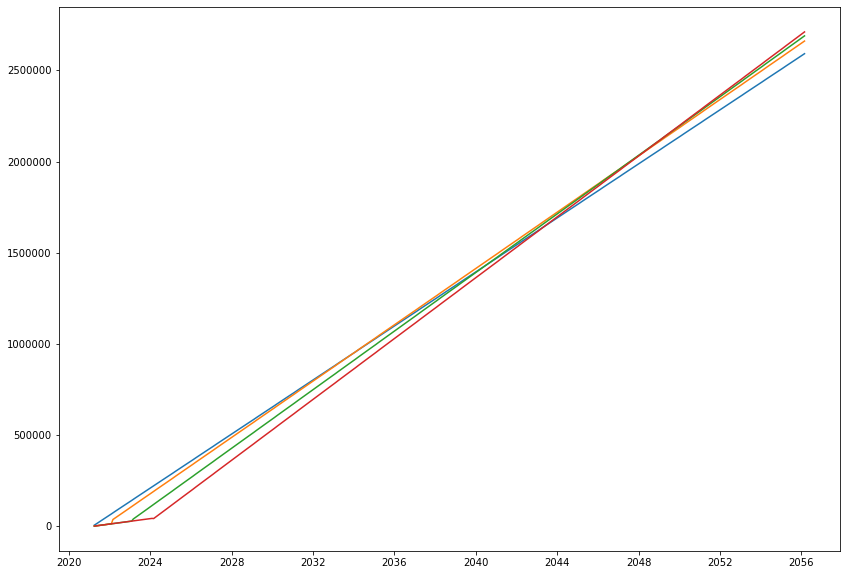

In [25]:
fig, ax = plt.subplots(figsize = (14, 10))
plt.plot(total_df);

In [39]:
total_df.iloc[[np.where(df.index > '2046-10-01')][0][0]]

,retire_2021,retire_2022,retire_2023,retire_2024
2046-10-31,1900668,1940922,1940190,1932936
2046-11-30,1906839,1947353,1946881,1939886
2046-12-31,1913010,1953784,1953572,1946836
2047-01-31,1919181,1960215,1960263,1953786
2047-02-28,1925352,1966646,1966954,1960736
...,...,...,...,...
2055-10-31,2567136,2635470,2662818,2683536
2055-11-30,2573307,2641901,2669509,2690486
2055-12-31,2579478,2648332,2676200,2697436
2056-01-31,2585649,2654763,2682891,2704386
